# Playing with the Radon Transform
stough 202-

In this worksheet, please explore a bit about the [radon transform](http://scikit-image.org/docs/dev/auto_examples/transform/plot_radon_transform.html).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon, rotate, matrix_transform
import matplotlib.animation as animation

# For importing from alternative directory sources
import sys  
sys.path.insert(0, '../dip_utils')

from matrix_utils import (arr_info,
                          make_linmap)
from vis_utils import (vis_rgb_cube,
                       vis_hists,
                       vis_image,
                       vis_pair,
                       vis_surface)
from wavelet_utils import (make_dct_matrix,
                           make_haar_matrix)

In [2]:
# helper function to illustrate sinogram
def show_sinogram(image, sinogram):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

    ax1.set_title("Original")
    ax1.imshow(image, cmap=plt.cm.Greys_r)

    theta = np.linspace(0., 180., max(sinogram.shape), endpoint=False)

    ax2.set_title("Radon transform\n(Sinogram)")
    ax2.set_xlabel("Projection angle (deg)")
    ax2.set_ylabel("Projection position (pixels)")
    ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
               extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

    fig.tight_layout()
    plt.show()

## 1. Viewing simple images in the sinogram space.

View several simple images in the sinogram space. For each, try to explain what you see.

Note, by "explain what you see," I mean try to reason about how the content of the image relates to
- where the sinogram is nonzero
- where the sinogram is particularly bright versus not.

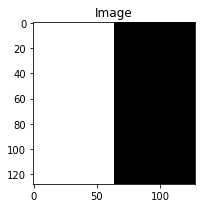

In [3]:
H = make_haar_matrix(128)
I1 = np.clip(np.outer(H[0], H[1]), 0, 1)
vis_image(I1, cmap='gray')

C:\Users\Admin\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])
C:\Users\Admin\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:91: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


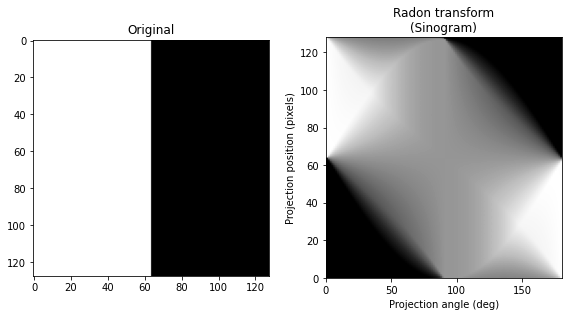

In [4]:
# View with Radon
theta = np.linspace(0., 180., 128, endpoint=False)
R1 = radon(I1, theta=theta, circle=True)
show_sinogram(I1, R1)

### Explain what you see

The sinogram is nonzero except the lower left and upper right corners, where half of the vertical X-rays are not blocked (go through the black area). There are two triangular areas that are particularly bright in the upper left and lower right regions, which suggests half of the vertical X-rays are totally blocked by the white area in the orignial graph. The gray areas are where X-rays are partially blocked by the white area; while the central column is all grey as it reflects all the horizontal X-rays are blocked by half of the image (white area). 

The sinogram overall reflects when vertical X-rays rotate counterclockwise, half of them are blocked, until horizontally all blocked, to the other half of them become blocked at last.

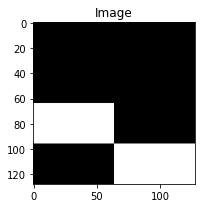

In [5]:
# Another example
I2 = np.clip(np.outer(H[3], H[1]), 0, 1)
vis_image(I2, cmap='gray')

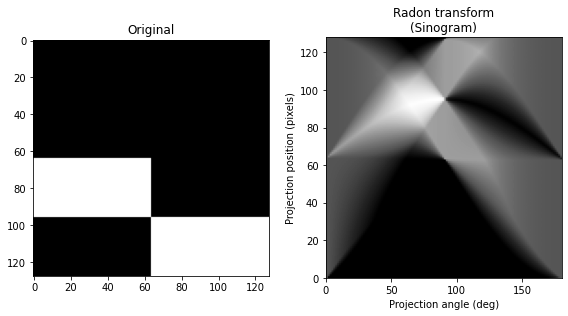

In [6]:
# View with Radon
R2 = radon(I2, theta=theta, circle=True)
show_sinogram(I2, R2)

### Explain what you see

The first column of the sinogram is nonzero since the vertical X-rays are all blocked by the white areas. As the X-rays rotate counterclockwise, some X-rays are blocked both by the left and right white areas, reflected by the particularly bright regions in the sinogram. The more horizontal X-rays are, the less they are blocked, the more black regions are there in the sinogram. As all the X-rays are horizontal ($\varphi=90$), the upper half of the central column in the sinogram is all gray since half of the X-rays are blocked by the lower half of original the image. Then as X-rays point downward from the top, where they go through black areas first, the sinogram has some black regions (zero). Finally, X-rays are perpendicular to the white areas again so the last column of the sinogram is all gray again,

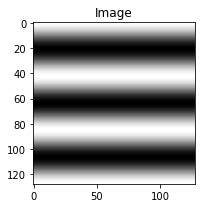

In [7]:
# Another example
H = make_dct_matrix(128)
I3 = np.outer(H[6], H[0])
I3 = (I3-I3.min())/(I3.max() - I3.min())
vis_image(I3, cmap='gray')

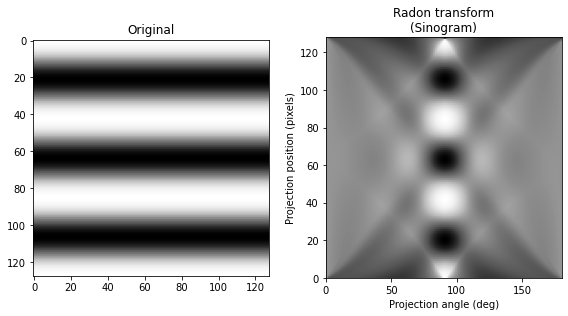

In [8]:
# View with Radon
R3 = radon(I3, theta=theta, circle=True)
show_sinogram(I3, R3)

### Explain what you see

You might try this example with the `circle` parameter to [radon](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.radon) set to `False`. If you look at just the first column of the sinogram, what does that tell you? What about if you plot the column midway through the sinogram, corresponding to $\varphi = 90$ 

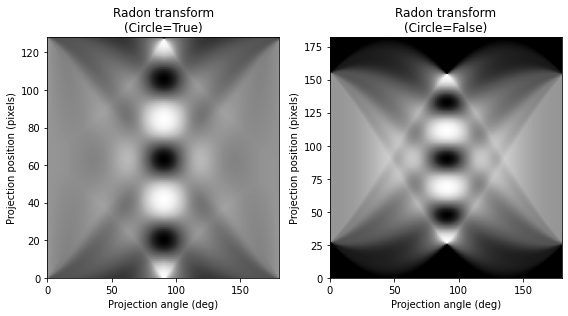

In [9]:
R4 = radon(I3, theta=theta, circle=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Radon transform\n(Circle=True)")
ax1.set_xlabel("Projection angle (deg)")
ax1.set_ylabel("Projection position (pixels)")
ax1.imshow(R3, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, R3.shape[0]), aspect='auto')

theta = np.linspace(0., 180., max(R4.shape), endpoint=False)

ax2.set_title("Radon transform\n(Circle=False)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(R4, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, R4.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

There are more columns with `circle` set to `False` in the sinogram.

The first column of the new sinogram (`circle=False`) looks like the same as that of the original sinogram (`circle=True`) but with extra zeros above and below. That tells there are more empty space (black or zeros) with shape of vertial tiles in the original image in the left and right.

The column midway through the sinogram is just like the first column, with added zeros as well, which means extra horizontal black tiles above and below the original image.

## 2. Manipulate a grayscale image in the radon/sinogram space.

Try a relatively simple image with a black background, will be quite a bit easier to understand. See a search like [this](https://www.google.com/search?as_st=y&tbm=isch&as_q=black+background+images&as_epq=&as_oq=&as_eq=&imgsz=&imgar=&imgc=&imgcolor=&imgtype=&cr=&as_sitesearch=&safe=images&as_filetype=&tbs=).

### Explain what you see in the sinogram.

### Show and explain what happens if you zero out the middle $N$ rows of the sinogram. 
You can use [`iradon`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.iradon) to go from a sinogram back to the spatial domain.